In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

In [9]:
project_root = Path().absolute().parent
sys.path.append(str(project_root))

import src.models as model

In [10]:
data = pd.read_csv("../data/final/telecom_sales_data_final.csv")
data.head()

,date,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,store_traffic,public_transport,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,...,city_Lille,city_Lyon,city_Marseille,city_Paris,city_Rennes,city_Strasbourg,5g_phase_Early-5G,5g_phase_Mature-5G,5g_phase_Mid-5G,5g_phase_Pre-5G
0,2019-01-01,100.00,50.00,85.0,120.00,0,0.02,1,122182.54,68709.20,...,False,False,False,True,False,False,False,False,False,True
1,2019-01-02,100.09,50.52,85.0,120.09,1,1.08,0,146473.79,73935.56,...,False,False,False,True,False,False,False,False,False,True
2,2019-01-03,100.18,51.04,85.0,120.17,2,-0.24,2,129647.90,75375.54,...,False,False,False,True,False,False,False,False,False,True
3,2019-01-04,100.27,51.56,85.0,120.26,2,-0.13,3,137621.01,85213.00,...,False,False,False,True,False,False,False,False,False,True
4,2019-01-05,100.36,52.08,85.0,120.34,0,0.06,2,194936.87,89281.49,...,False,False,False,True,False,False,False,False,False,True


In [11]:
# Charger les données
data = pd.read_csv("../data/final/telecom_sales_data_final.csv")
data['date'] = pd.to_datetime(data['date'])

# Générer les prévisions
forecasts = model.forecast_all_phones(data)


# Visualiser un aperçu des résultats
for phone in forecasts:
    print(f"\nPrévisions pour {phone}:")
    print(forecasts[phone].head())
    
    # Calculer quelques statistiques
    mean_revenue = forecasts[phone].groupby('city')['predicted_revenue'].mean()
    print("\nRevenu moyen par ville:")
    print(mean_revenue)

Génération des prévisions pour jPhone_Pro_revenue...
Génération des prévisions pour Kaggle_Pixel_5_revenue...
Génération des prévisions pour Planet_SX_revenue...

Prévisions pour jPhone_Pro_revenue:
        date       city  predicted_revenue
0 2025-01-01  Marseille       45436.026599
1 2025-01-02  Marseille       40945.457930
2 2025-01-03  Marseille       43184.567544
3 2025-01-04  Marseille       42808.969217
4 2025-01-05  Marseille       42388.205467

Revenu moyen par ville:
city
Marseille    43003.563463
Paris        39834.050833
Name: predicted_revenue, dtype: float64

Prévisions pour Kaggle_Pixel_5_revenue:
        date       city  predicted_revenue
0 2025-01-01  Marseille       21626.074140
1 2025-01-02  Marseille       19935.632211
2 2025-01-03  Marseille       22126.772260
3 2025-01-04  Marseille       22678.439483
4 2025-01-05  Marseille       22754.146193

Revenu moyen par ville:
city
Marseille    22218.60592
Paris        20500.68078
Name: predicted_revenue, dtype: float64

P

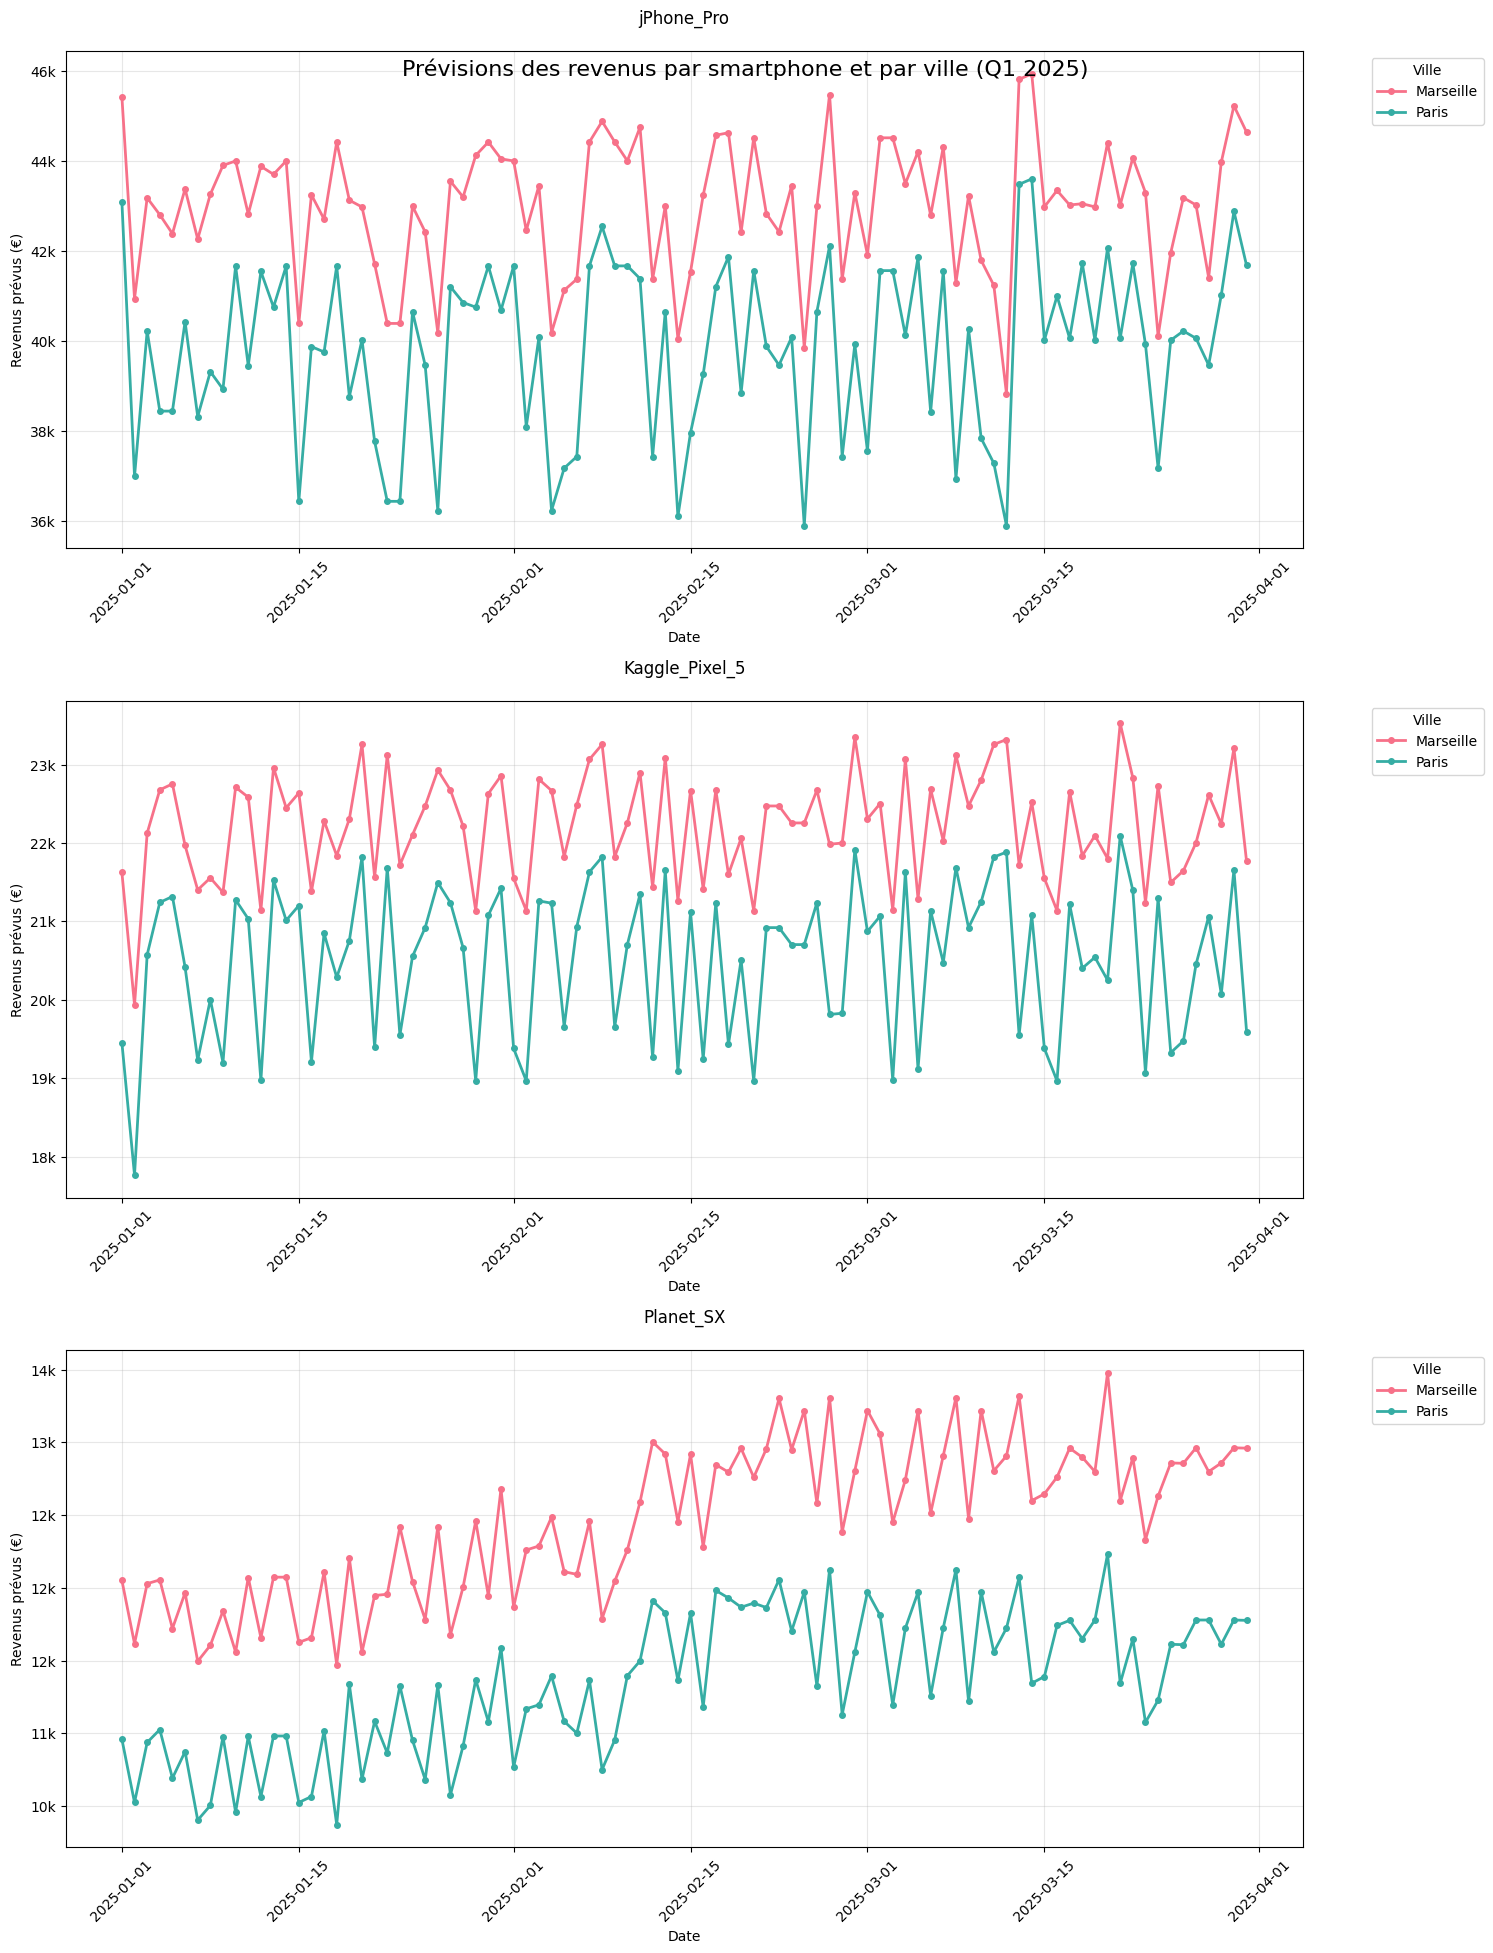

In [12]:
colors = sns.color_palette("husl", 2)  # Un pour chaque ville

# Créer un subplot pour chaque modèle de téléphone
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = np.array(axes)  # Convert to numpy array
fig.suptitle('Prévisions des revenus par smartphone et par ville (Q1 2025)', 
            fontsize=16, y=0.95)

# Pour chaque modèle de téléphone
for idx, (phone, forecast_data) in enumerate(forecasts.items()):
    ax = axes[idx]
    
    # Tracer les lignes pour chaque ville
    for city_idx, city in enumerate(forecast_data['city'].unique()):
        city_data = forecast_data[forecast_data['city'] == city]
        ax.plot(city_data['date'].values, 
            city_data['predicted_revenue'].values,
            label=city,
            color=colors[city_idx],
            linewidth=2,
            marker='o',
            markersize=4)

    
    # Configurer le graphique
    ax.set_title(phone.replace('_revenue', ''), pad=20)
    ax.set_xlabel('Date')
    ax.set_ylabel('Revenus prévus (€)')
    ax.grid(True, alpha=0.3)
    ax.legend(title='Ville', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotation des dates sur l'axe x
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    # Formater les valeurs de l'axe y en k€
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:,.0f}k'))

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()